<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


En esta tarea, predeciremos si la primera etapa del Falcon 9 aterrizará con éxito. SpaceX anuncia lanzamientos de cohetes Falcon 9 en su sitio web con un costo de 62 millones de dólares; otros proveedores cuestan más de 165 millones de dólares cada uno, gran parte del ahorro se debe al hecho de que SpaceX puede reutilizar la primera etapa.

En esta práctica de laboratorio, realizará análisis de datos exploratorios e ingeniería de características.

Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objetivos

Realice análisis de datos exploratorios e ingeniería de características usando `Pandas` y `Matplotlib`

*   Análisis exploratorio de datos
* Preparación de ingeniería de características de datos

***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [6]:
import plotly.express as px

## Exploratory Data Analysis


Primero, leamos el conjunto de datos de SpaceX en un marco de datos de Pandas e imprimamos su resumen

In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Si no pudo completar el laboratorio anterior correctamente, puede descomentar y cargar este csv

df2=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
df2.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Primero, intentemos ver cómo las variables `FlightNumber` (que indica los continuos intentos de lanzamiento) y `Payload` afectarían el resultado del lanzamiento.

Podemos trazar el <code>FlightNumber</code> frente a <code>PayloadMass</code> y superponer el resultado del lanzamiento. Vemos que a medida que aumenta el número de vuelos, es más probable que la primera etapa aterrice con éxito. La masa de la carga útil también es importante; parece que cuanto más masiva es la carga útil, menos probable es que regrese la primera etapa.

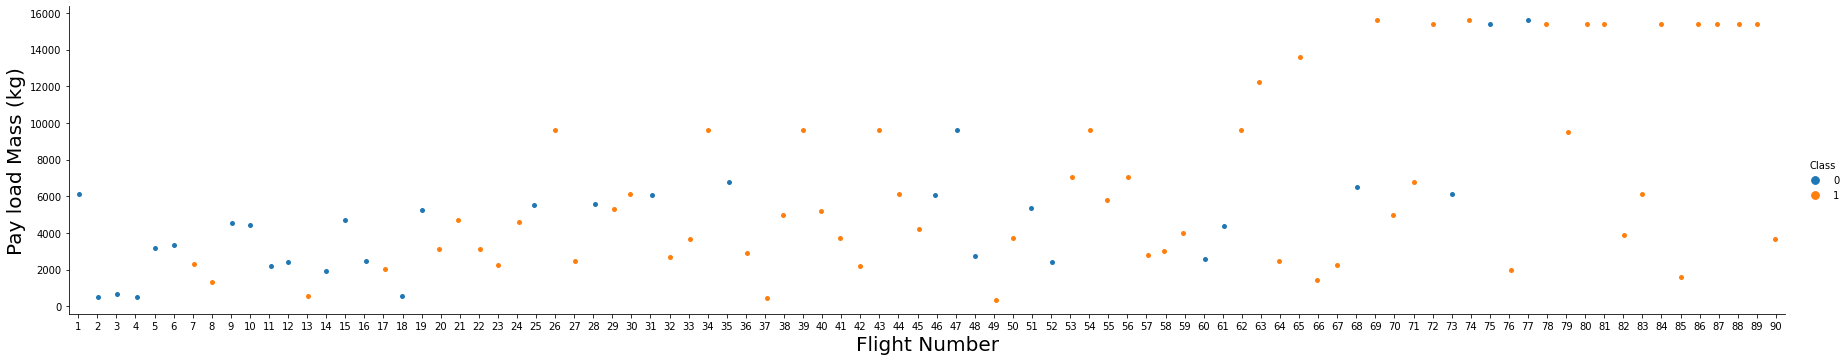

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Vemos que diferentes sitios de lanzamiento tienen diferentes tasas de éxito. <code>CCAFS LC-40</code>, tiene una tasa de éxito del 60 %, mientras que <code>KSC LC-39A</code> y <code>VAFB SLC 4E</code> tienen una tasa de éxito del 77 % .

A continuación, profundicemos en cada sitio para visualizar sus registros de lanzamiento detallados.

### TAREA 1: Visualizar la relación entre el número de vuelo y el sitio de lanzamiento

Use la función <code>catplot</code> para trazar <code>FlightNumber</code> vs <code>LaunchSite</code>, establezca el parámetro <code>x</code> en <code>FlightNumber</ code>, establezca <code>y</code> en <code>Launch Site</code> y establezca el parámetro <code>hue</code> en <code>'class'</code>

In [8]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


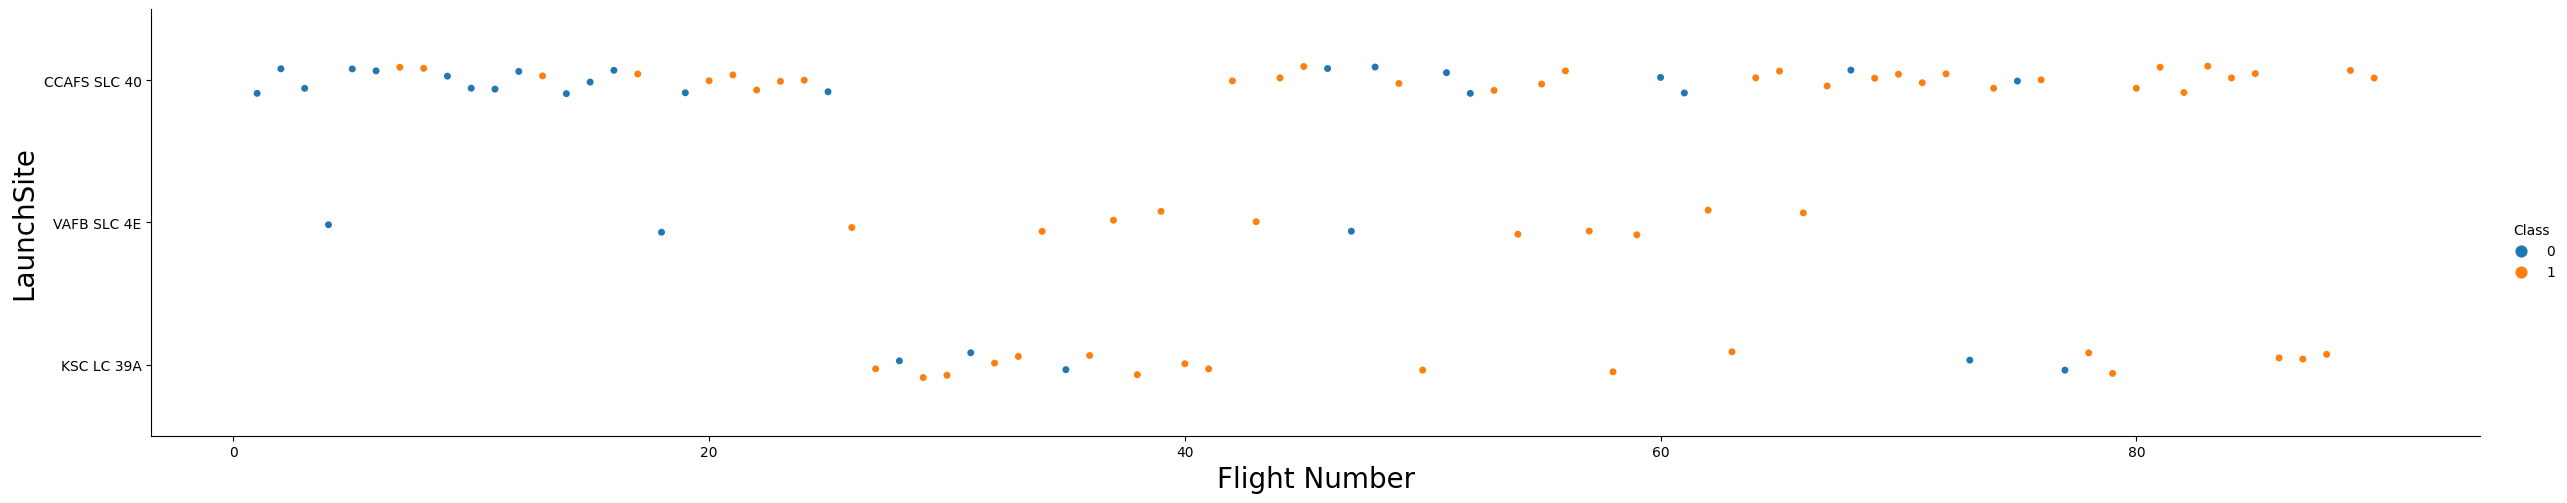

In [14]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

sns.catplot( x='FlightNumber', y = 'LaunchSite', hue = "Class", data=df ,aspect= 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

### TAREA 2: Visualizar la relación entre la carga útil y el sitio de lanzamiento

También queremos observar si existe alguna relación entre los sitios de lanzamiento y su masa de carga útil.

In [16]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

<AxesSubplot:xlabel='PayloadMass', ylabel='LaunchSite'>

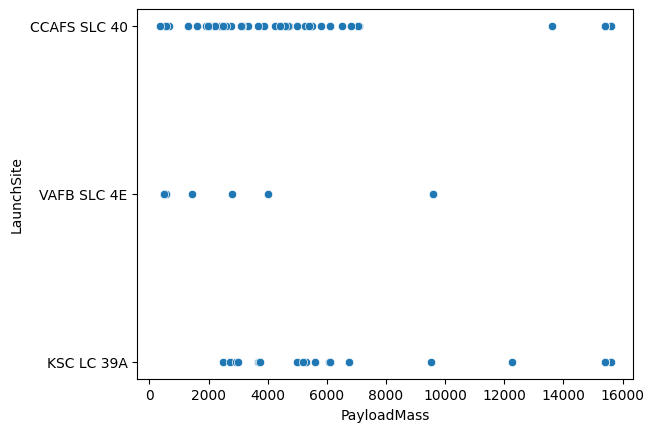

In [20]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.scatterplot(x= 'PayloadMass', y='LaunchSite', data= df, sizes=20 )


In [22]:
px.scatter(data_frame= df, y='LaunchSite',  x= 'PayloadMass',)

Ahora, si observa Payload vs. El gráfico de puntos de dispersión del sitio de lanzamiento que encontrará para el sitio de lanzamiento VAFB-SLC no se lanzan cohetes para una masa de carga pesada (superior a 10000).

### TAREA 3: Visualizar la relación entre la tasa de éxito de cada tipo de órbita

A continuación, queremos verificar visualmente si existe alguna relación entre la tasa de éxito y el tipo de órbita.

Vamos a crear un `gráfico de barras` para la tasa de éxito de cada órbita

<AxesSubplot:xlabel='Orbit'>

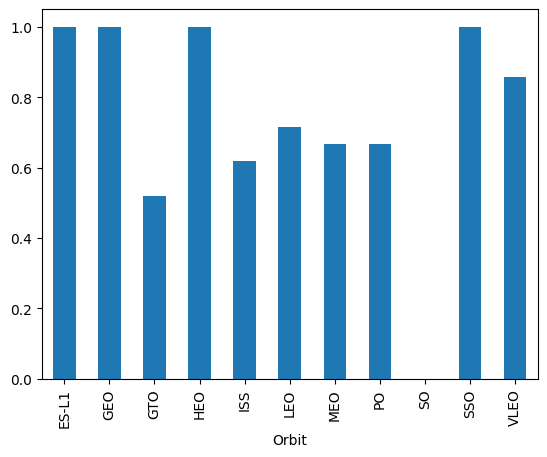

In [31]:
#SUGERENCIA use el método groupby en la columna Orbit y obtenga la media de la columna Class

medias = df.groupby("Orbit")["Class"].mean()
medias.plot(kind = "bar")


In [34]:
px.bar(df.groupby("Orbit")["Class"].mean(), title ="Histograma valores promedio de orbitas")

Analice el gráfico de barras trazado e intente encontrar qué órbitas tienen una alta tasa de éxito.

### TAREA 4: Visualizar la relación entre el número de vuelo y el tipo de órbita

Para cada órbita, queremos ver si existe alguna relación entre FlightNumber y Orbit type.

In [36]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


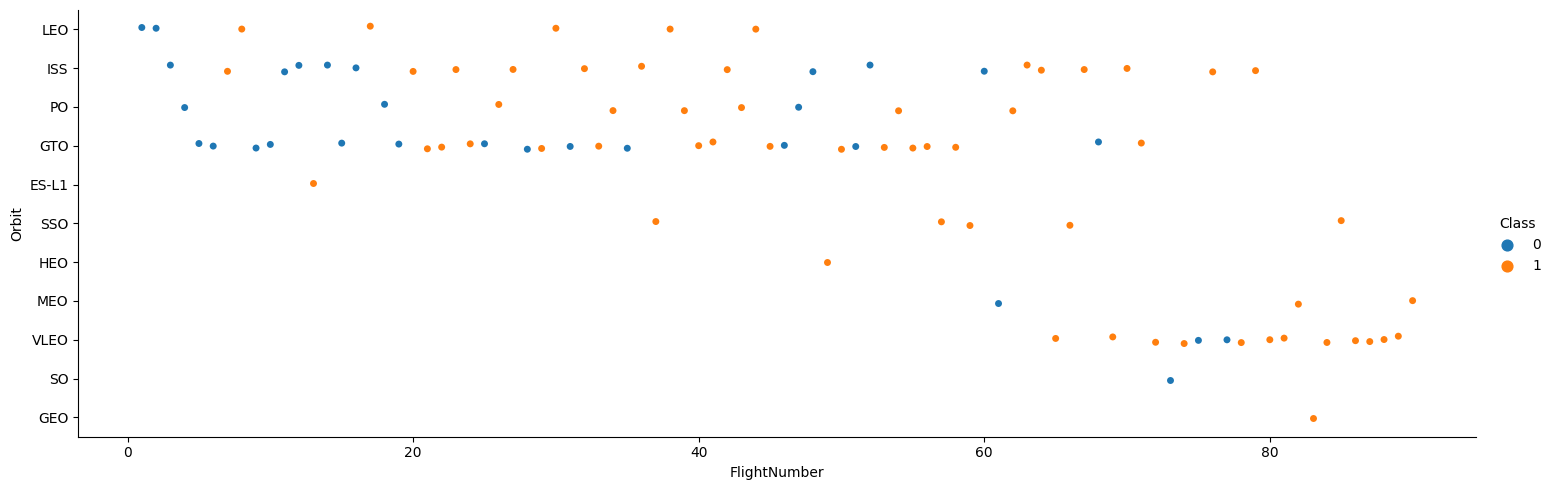

In [50]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

sns.catplot( x= "FlightNumber", y = "Orbit",data = df ,hue = "Class", aspect = 3)


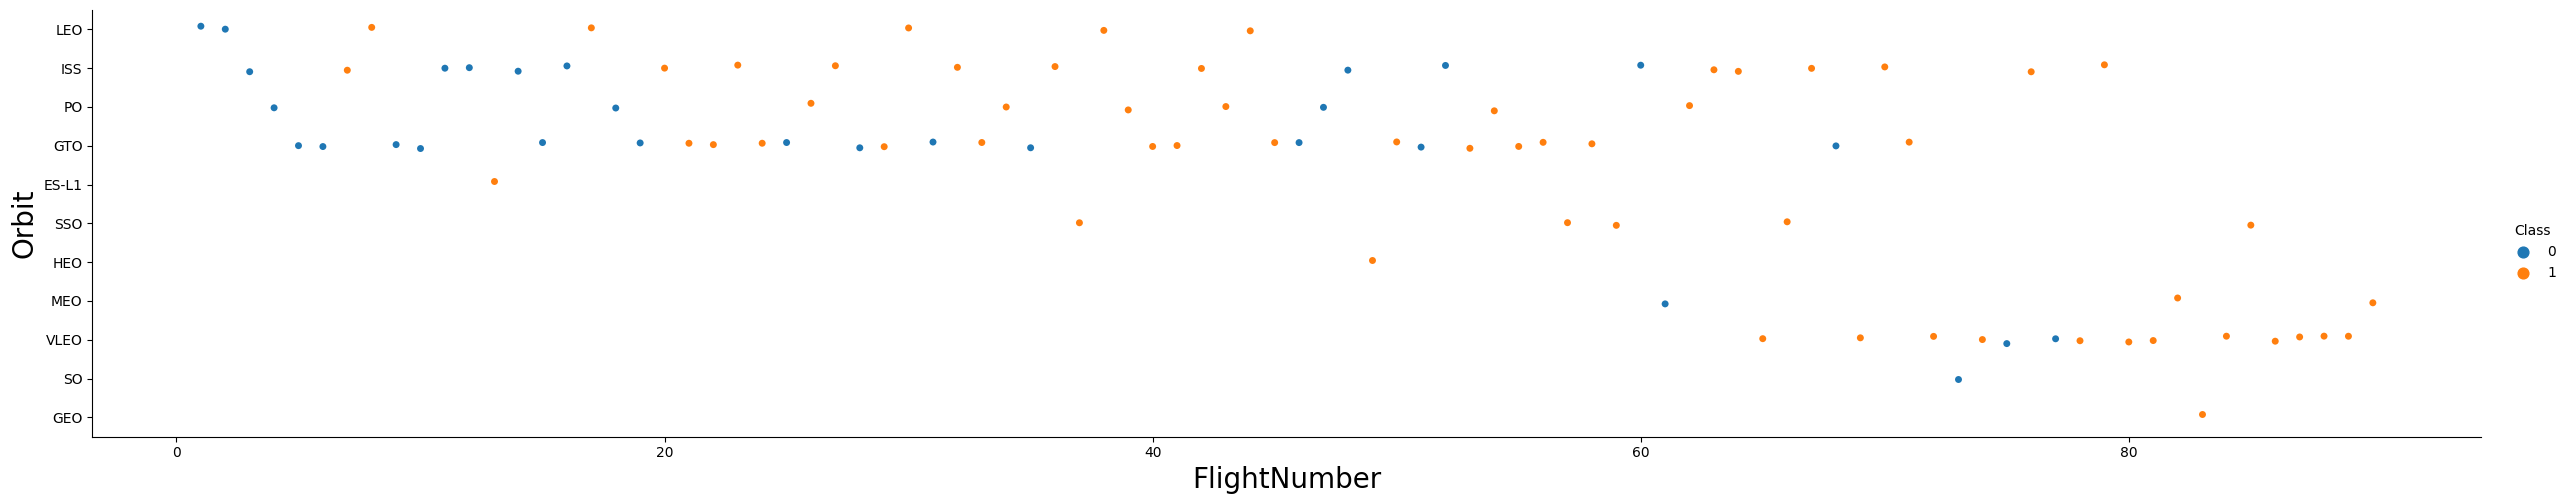

In [47]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

In [51]:
px.scatter(data_frame=df, y= "Orbit", x="FlightNumber", color= "Class",)


Deberías ver que en la órbita LEO aparece el Éxito relacionado con el número de vuelos; por otro lado, no parece haber relación entre el número de vuelo cuando está en órbita GTO.

### TAREA 5: Visualizar la relación entre la carga útil y el tipo de órbita

Del mismo modo, podemos trazar los gráficos de puntos de dispersión de la carga útil frente a la órbita para revelar la relación entre la carga útil y el tipo de órbita.

In [53]:
px.scatter(df, x ="PayloadMass" , y = "Orbit", color = "Class")

Con cargas útiles pesadas, el aterrizaje exitoso o la tasa de aterrizaje positivo son más para Polar, LEO e ISS.

Sin embargo, para GTO no podemos distinguir esto bien, ya que tanto la tasa de aterrizaje positiva como la negativa (misión fallida) están aquí.

### TAREA 6: Visualizar la tendencia anual del éxito del lanzamiento

Puede trazar un gráfico de líneas con el eje x para ser <code>Year</code> y el eje y para ser la tasa de éxito promedio, para obtener la tendencia de éxito de lanzamiento promedio.

In [54]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [59]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [64]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success ratee
df1=pd.DataFrame(Extract_year(df['Date']),columns =['year'])
df1['Class']=df['Class']
df1.head()

,year,Class
0,2010,0.0
1,2012,0.0
2,2013,0.0
3,2013,0.0
4,2013,0.0


In [66]:
import numpy as np

In [70]:
px.line(df1.groupby('year')['Class'].mean())

puede observar que la tasa de éxito desde 2013 siguió aumentando hasta 2020

## Ingeniería de características

A estas alturas, debería obtener algunas ideas preliminares sobre cómo cada variable importante afectaría la tasa de éxito, seleccionaremos las funciones que se utilizarán en la predicción de éxito en el módulo futuro.

In [71]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Utilice la función <code> get_dummies </code> y el marco de datos <code >features </code> para aplicar OneHotEncoder a la columna <code> Órbitas </code>, <code> LaunchSite </code>, <code> LandingPad< /código> y <código> Serie </código>. Asigne el valor a la variable <code> features_one_hot </code>, muestre los resultados usando el encabezado del método. Su marco de datos de resultados debe incluir todas las funciones, incluidas las codificadas.

In [78]:
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [77]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
features_one_hot.shape

(90, 80)

### TASK  8: Cast all numeric columns to `float64`


Ahora que nuestro marco de datos <code>features_one_hot</code> solo contiene números, convierta el marco de datos completo al tipo de variable <code>float64</code>

In [82]:
# HINT: use astype function
features_one_hot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     bool   
 4   Reused                               90 non-null     bool   
 5   Legs                                 90 non-null     bool   
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     uint8  
 9   Orbit_GEO                            90 non-null     uint8  
 10  Orbit_GTO                            90 non-null     uint8  
 11  Orbit_HEO                         

In [88]:
features_one_hot = features_one_hot.astype("float")

In [89]:
features_one_hot.tail()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
85,86.0,15400.0,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.0,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.0,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.0,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
89,90.0,3681.0,1.0,1.0,0.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [90]:
features_one_hot.to_csv('dataset_part_3.csv')

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |
| 2020-11-10        | 1.1     | Nayef         | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
